In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('rice.csv')

df.head()

,Date,price
0,2021-09/23,57356
1,2021-09/24,57356
2,2021-09/27,56911
3,2021-09/28,56663
4,2021-09/29,56663


In [3]:
df.describe()

,price
count,242.000000
mean,50847.384298
std,3055.305294
min,45800.000000
25%,48080.000000
50%,51840.000000
75%,52680.000000
max,57356.000000


In [4]:
df = df.rename(columns={'Date' : 'ds', 'price' : 'y'})
df.head

<bound method NDFrame.head of              ds      y
0    2021-09/23  57356
1    2021-09/24  57356
2    2021-09/27  56911
3    2021-09/28  56663
4    2021-09/29  56663
..          ...    ...
237  2022-09/07  46700
238  2022-09/08  47033
239  2022-09/13  46983
240  2022-09/14  46888
241  2022-09/15  46350

[242 rows x 2 columns]>

<AxesSubplot:xlabel='ds'>

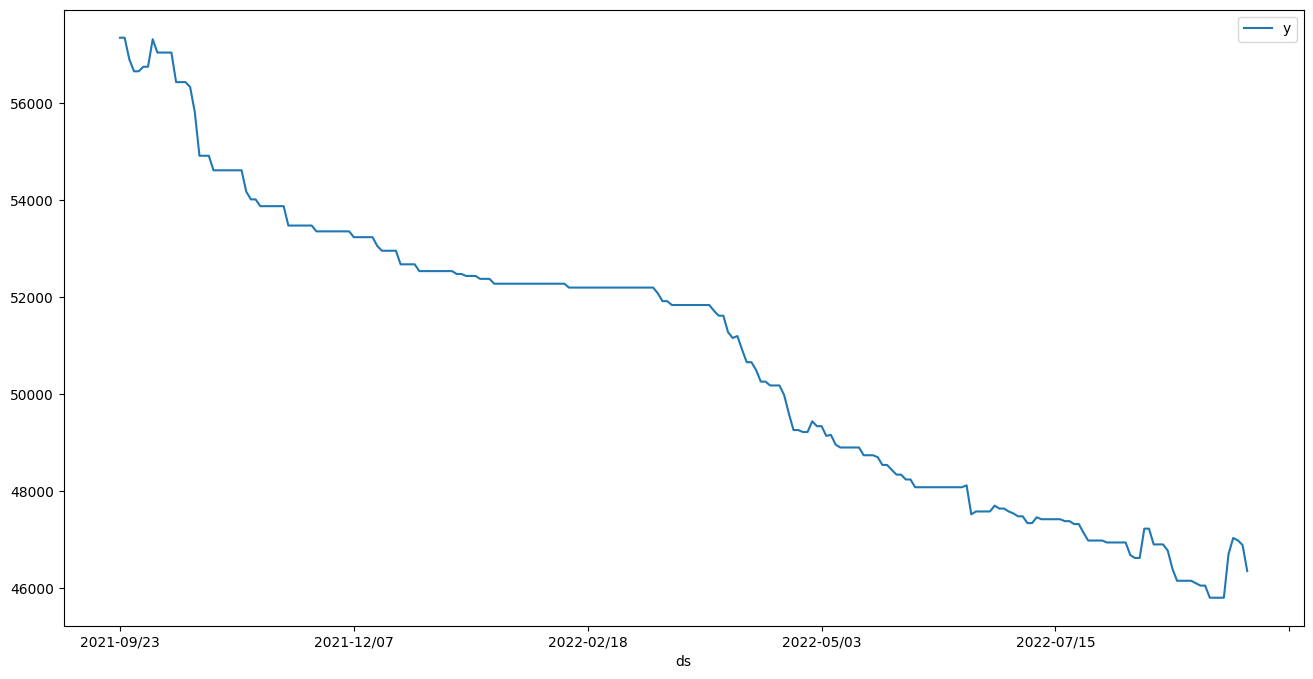

In [5]:
df.plot(x='ds', y='y', figsize=(16,8))

In [6]:
model = Prophet()

model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.07407


/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1167.62      0.005277       926.573           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1182.54    0.00253024       257.452           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1189.02   0.000297888       387.101           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       1189.99   1.03282e-05       233.182   2.429e-08       0.001      458  LS failed, Hessian reset 
     399          1191    0.00196674       436.509           1           1      511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1192.48     0.0026434       950.095           1           1      6

In [7]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)


forecast.tail()
forecast.to_csv('rice_result.csv')
b = pd.read_csv('rice_result.csv')
c = (b[['ds','yhat',]])

c.to_csv('2.csv')



/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


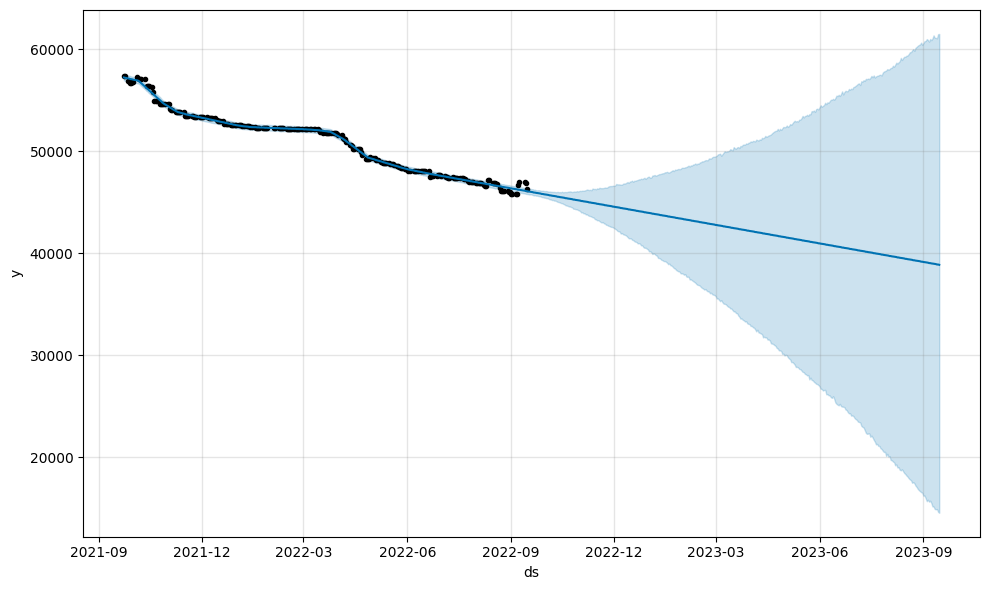

In [8]:
fig1 = model.plot(forecast)